In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

In [2]:


df=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2018Posts/September/Terror/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','Attack_Type','Killed','Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive']]
df

/Users/neilwatt/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Day,Country,Region,city,latitude,longitude,Attack_Type,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [3]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
Attack_Type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_Type         0
Weapon_Type         0
Motive         131130
dtype: int64

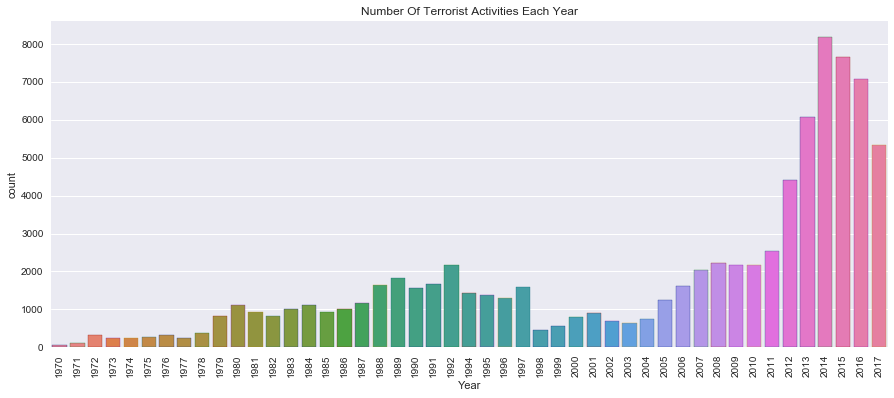

In [4]:
#plot count of terror activities each year 
selected=df[(df['Killed'] > 0) ]
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=selected,palette='husl',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.savefig('Terrorist_Activities_by_Year.png')
plt.show()

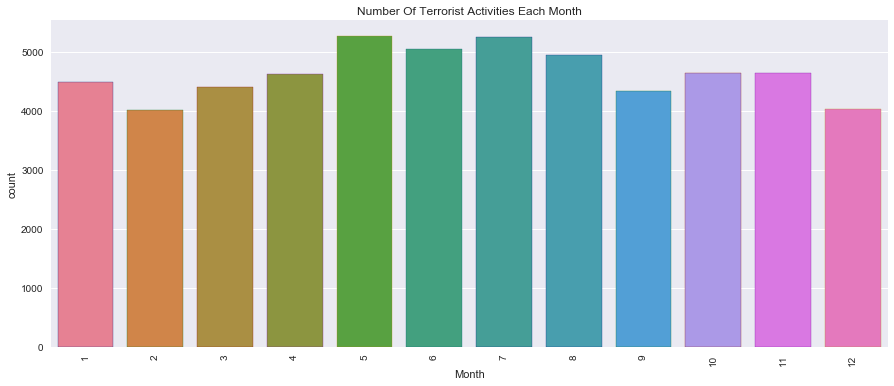

In [5]:
#plot count of terror activities each month
selected=df[(df['Killed'] > 0) &(df['Year'] > 2000)]
plt.subplots(figsize=(15,6))
sns.countplot('Month',data=selected,palette='husl',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Month')
plt.savefig('Terrorist_Activities_by_Month.png')
plt.show()


In [6]:


selected['Month'].value_counts()



5     5276
7     5254
6     5060
8     4954
11    4650
10    4644
4     4623
1     4491
3     4401
9     4340
12    4029
2     4016
Name: Month, dtype: int64

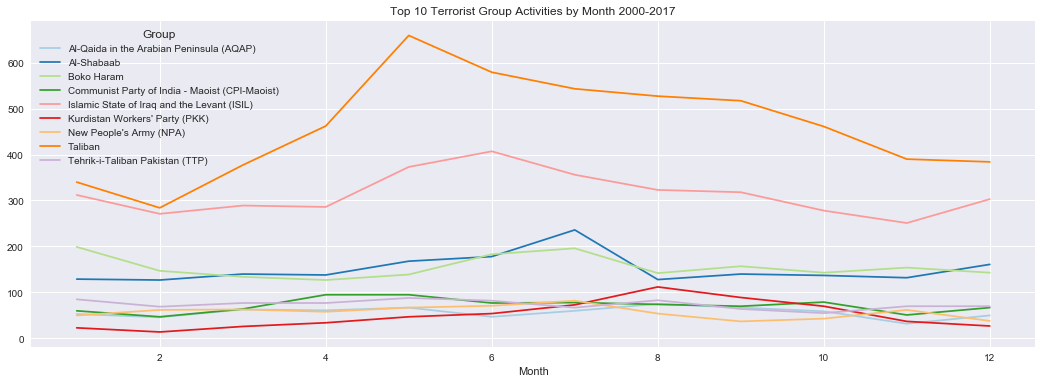

In [7]:


top_groups10=selected[selected['Group'].isin(selected['Group'].value_counts()[1:10].index)]
pd.crosstab(top_groups10.Month,top_groups10.Group).plot(color=sns.color_palette('Paired',11))
plt.title('Top 10 Terrorist Group Activities by Month 2000-2017')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.savefig('Top_10_Terrorist_Activities_by_Month.png')
plt.show()

In [8]:
pd.crosstab(top_groups10.Month,top_groups10.Group)

Group,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),New People's Army (NPA),Taliban,Tehrik-i-Taliban Pakistan (TTP)
Month,,,,,,,,,
1,53,129,199,60,312,23,50,340,85
2,46,127,147,47,271,14,62,284,69
3,63,140,134,64,289,26,63,377,77
4,61,138,127,95,286,34,58,462,77
5,67,168,139,95,373,47,67,659,88
6,47,178,183,77,407,54,71,579,82
7,60,236,196,78,356,73,82,543,67
8,75,128,142,74,323,112,54,527,83
9,67,140,157,70,318,89,37,517,64


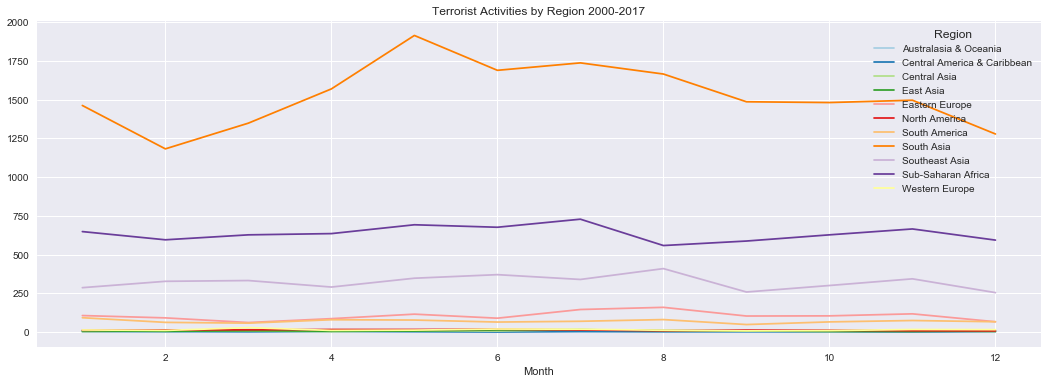

In [9]:
#plotting activities by region by month
top_regions20=selected[selected['Region'].isin(selected['Region'].value_counts()[1:20].index)]
pd.crosstab(top_regions20.Month,top_regions20.Region).plot(color=sns.color_palette('Paired',21))
plt.title('Terrorist Activities by Region 2000-2017')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.savefig('Terrorist_Activities_by_Region_Month.png')
plt.show()

In [10]:
pd.crosstab(top_regions20.Month,top_regions20.Region)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Month,,,,,,,,,,,
1,0,4,2,7,106,11,92,1462,286,648,13
2,1,4,7,4,91,13,62,1182,327,595,10
3,0,2,7,8,61,14,57,1348,332,627,28
4,1,5,2,5,86,16,79,1569,290,635,10
5,0,3,8,6,115,16,77,1914,347,692,12
6,1,0,6,13,89,18,64,1689,370,676,19
7,0,4,15,15,145,13,69,1737,339,728,18
8,1,2,10,8,159,8,80,1665,409,558,11
9,1,2,8,6,103,12,48,1486,258,587,7


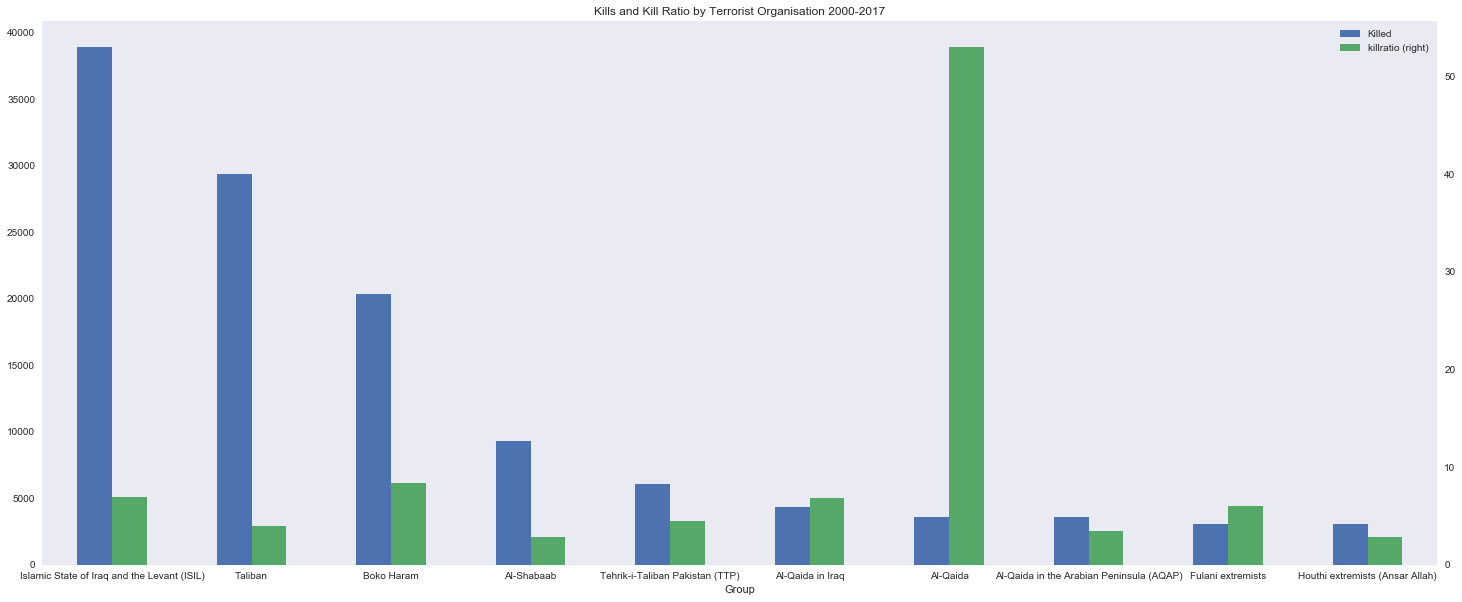

In [12]:
#ratio of deaths to incidents by organisation from 2000 onwards
after2000=df[(df['Year'] > 2000) &(df['Group'] != "Unknown") ]

countgroup=after2000['Group'].value_counts()


group2000=pd.DataFrame(after2000.groupby("Group")["Killed"].sum())



group2000['killratio']=group2000['Killed']/countgroup

sortedbykilled=group2000.sort_values(by=['Killed'], ascending=False)

tenlargest=sortedbykilled.nlargest(10, 'Killed')

_ = tenlargest.plot( kind= 'bar' , secondary_y= 'killratio' , rot= 0 )


plt.grid(False)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.title('Kills and Kill Ratio by Terrorist Organisation 2000-2017')
plt.savefig('Kills and Kill Ratio by Terrorist Organisation.png')

plt.show()


In [15]:
tenlargest


,Killed,killratio
Group,,
Islamic State of Iraq and the Levant (ISIL),38923.0,6.934438
Taliban,29410.0,3.934975
Boko Haram,20328.0,8.406948
Al-Shabaab,9330.0,2.837591
Tehrik-i-Taliban Pakistan (TTP),6042.0,4.472243
Al-Qaida in Iraq,4381.0,6.866771
Al-Qaida,3603.0,52.985294
Al-Qaida in the Arabian Peninsula (AQAP),3565.0,3.495098
Fulani extremists,3083.0,6.033268


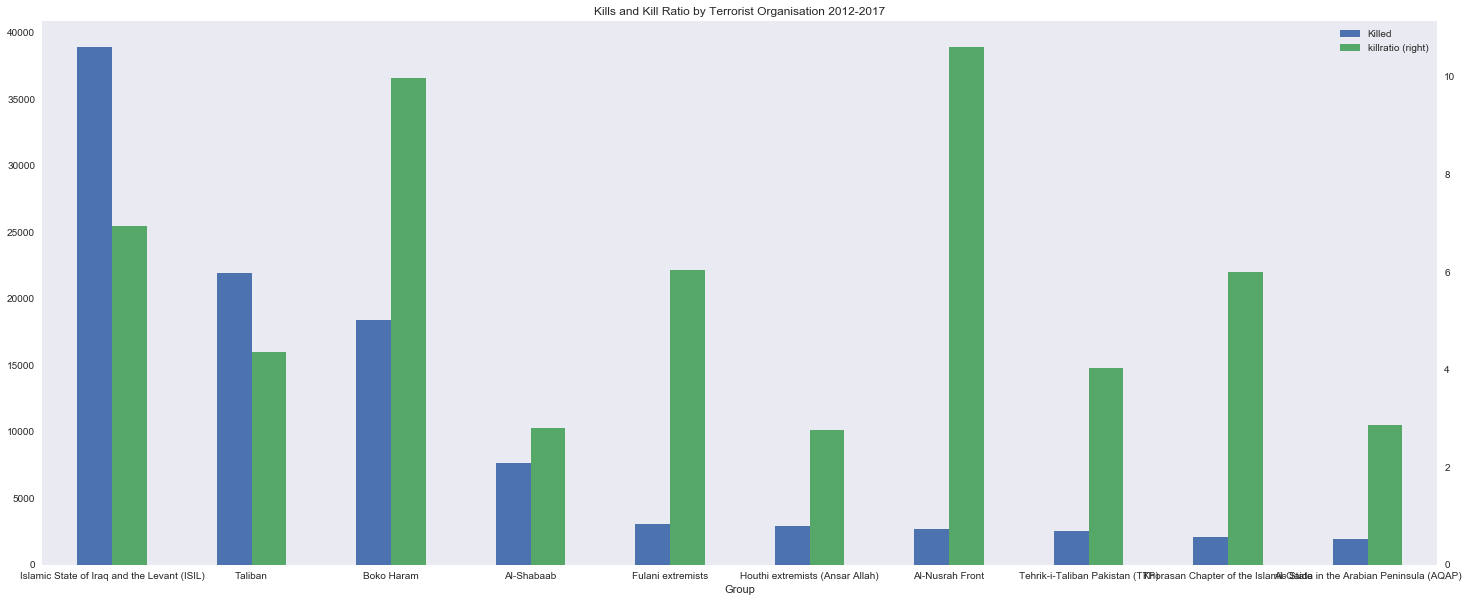

In [16]:
#ratio of deaths to incidents by organisation from 2012 onwards
after2012=df[(df['Year'] > 2012) &(df['Group'] != "Unknown") ]

countgroup2012=after2012['Group'].value_counts()


group2012=pd.DataFrame(after2012.groupby("Group")["Killed"].sum())



group2012['killratio']=group2012['Killed']/countgroup2012

sortedbykilled2012=group2012.sort_values(by=['Killed'], ascending=False)

tenlargest2012=sortedbykilled2012.nlargest(10, 'Killed')

_ = tenlargest2012.plot( kind= 'bar' , secondary_y= 'killratio' , rot= 0 )


plt.grid(False)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.title('Kills and Kill Ratio by Terrorist Organisation 2012-2017')
plt.savefig('Kills and Kill Ratio by Terrorist Organisation 2012-2017.png')

plt.show()

In [17]:
tenlargest2012

,Killed,killratio
Group,,
Islamic State of Iraq and the Levant (ISIL),38923.0,6.934438
Taliban,21926.0,4.369470
Boko Haram,18369.0,9.972313
Al-Shabaab,7633.0,2.799047
Fulani extremists,3050.0,6.039604
Houthi extremists (Ansar Allah),2903.0,2.770038
Al-Nusrah Front,2674.0,10.611111
Tehrik-i-Taliban Pakistan (TTP),2522.0,4.028754
Khorasan Chapter of the Islamic State,2057.0,5.997085


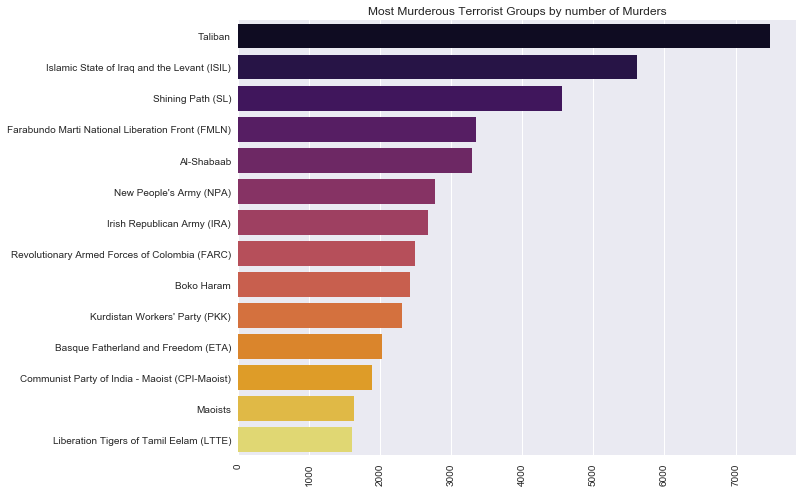

In [14]:
#after 2000
after2000=df[(df['Year'] >2000) ]
coun_kill=after2000.groupby('Country')['Killed'].sum().to_frame()

sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))

plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Most Murderous Terrorist Groups by number of Murders')
plt.show()


